# Business Understanding

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Data/AviationData.csv', encoding='latin-1')

C:\Users\hrcoh\AppData\Local\Temp\ipykernel_47336\2555783615.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Data/AviationData.csv', encoding='latin-1')


In [3]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [129]:
#Explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12917 entries, 50682 to 88767
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                12917 non-null  object        
 1   Type              12917 non-null  object        
 2   Accident_Number   12917 non-null  object        
 3   Date              12917 non-null  datetime64[ns]
 4   Country           12917 non-null  object        
 5   Injury_Severity   12917 non-null  object        
 6   Damage            12917 non-null  object        
 7   Category          12917 non-null  object        
 8   Make              12917 non-null  object        
 9   Model             12917 non-null  object        
 10  Amateur_Built     12917 non-null  object        
 11  Engines           12917 non-null  float64       
 12  Engine_Type       12917 non-null  object        
 13  Fatal_Injuries    12917 non-null  float64       
 14  Serious_Injuries  12917

In [130]:
#Explore summary statistics
df.describe()

,Date,Engines,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Total_Passengers
count,12917,12917.000000,12917.000000,12917.000000,12917.000000,12917.000000,12917.000000
mean,2014-04-16 16:22:35.608887552,1.112023,0.279322,0.249361,0.142603,1.182473,1.853759
min,2001-06-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010-10-10 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2013-12-13 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,2017-07-29 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,2022-11-09 00:00:00,8.000000,14.000000,9.000000,9.000000,20.000000,20.000000
std,NaN,0.334700,0.802704,0.636081,0.484773,1.367819,1.317297


In [131]:
#Looking at unique values in the columns that I don't fully understand
print(df['Amateur.Built'].unique(),'\n')
print(df['FAR.Description'].unique(),'\n')
print(df['Schedule'].unique(),'\n')
print(df['Report.Status'].unique(),'\n')
print(df['Registration.Number'].unique(),'\n')
print(df['Aircraft.damage'].unique(),'\n')
print(df['Engine.Type'].unique(),'\n')
print(df['Aircraft.Category'].unique())

KeyError: 'Amateur.Built'

For our analysis, we can drop FAR Description, Schedule, and Registration Number. Report Status. Amateur Built, Aircraft Category, Engine Type and Aircraft Damage may be helpful.

In [132]:
#Understanding differences bewteen injury columns
print(df['Injury.Severity'].unique(),'\n')
print(df['Total.Fatal.Injuries'].unique(),'\n')
print(df['Total.Serious.Injuries'].unique(),'\n')
print(df['Total.Minor.Injuries'].unique(),'\n')
print(df['Total.Uninjured'].unique())

KeyError: 'Injury.Severity'

### Data Understanding Summary

There are 31 columns and 88889 rows.

These are some areas we'll consider cleaning or analyzing:

Injury Severity gives us similar information to Total Fatal Injuries, Serious Injuries, Minor Injuries, and Uninjured. We may consider splitting Injury Severity so it just has the word classification and the number of injuries will be kept in the other columns.

Unknown: There are values included in some columns like 'Unknown, UNK, and Unavailable that are the same thing as Nan. We will note this for later.

Ensure data types are correct for each column.

Ensure there are no duplicates and that value formatting is standardized.

Drop columns that do not give us relevant information.

## Data Preparation

In [133]:
df_copy = df.copy()

In [134]:
#Change date column to datetime data type
df['Event.Date']=pd.to_datetime(df['Event.Date'], format='%Y-%m-%d')
df.info()

KeyError: 'Event.Date'

In [135]:
#Check for duplicates
df.duplicated().any()

False

In [136]:
#Checking for Missing Data or Nulls
df.isna().any()

ID                  False
Type                False
Accident_Number     False
Date                False
Country             False
Injury_Severity     False
Damage              False
Category            False
Make                False
Model               False
Amateur_Built       False
Engines             False
Engine_Type         False
Fatal_Injuries      False
Serious_Injuries    False
Minor_Injuries      False
Uninjured           False
Weather             False
City                False
State               False
Model_Simplified    False
Make_Model          False
Total_Passengers    False
dtype: bool

In [137]:
#Checking how many nulls in each column
df.isna().sum()

ID                  0
Type                0
Accident_Number     0
Date                0
Country             0
Injury_Severity     0
Damage              0
Category            0
Make                0
Model               0
Amateur_Built       0
Engines             0
Engine_Type         0
Fatal_Injuries      0
Serious_Injuries    0
Minor_Injuries      0
Uninjured           0
Weather             0
City                0
State               0
Model_Simplified    0
Make_Model          0
Total_Passengers    0
dtype: int64

In [138]:
#Checking what percentage of each column is null
df.isnull().sum()/df.shape[0]*100

ID                  0.0
Type                0.0
Accident_Number     0.0
Date                0.0
Country             0.0
Injury_Severity     0.0
Damage              0.0
Category            0.0
Make                0.0
Model               0.0
Amateur_Built       0.0
Engines             0.0
Engine_Type         0.0
Fatal_Injuries      0.0
Serious_Injuries    0.0
Minor_Injuries      0.0
Uninjured           0.0
Weather             0.0
City                0.0
State               0.0
Model_Simplified    0.0
Make_Model          0.0
Total_Passengers    0.0
dtype: float64

Let's drop all columns with over 30% null or missing data. Here are the columns that have too many nulls values or are irrelevant to the current business question: Latitude, Longitude, Airport Code, Airport Name, Registration Number, FAR Description, Schedule, Air Carrier, and Publication Date.

In [139]:
#Drop columns with too many missing values or irrevlant to our business question
dropped_columns=['Schedule', 'Air.carrier', 'Longitude','Latitude','Registration.Number','Purpose.of.flight','Publication.Date', 'Airport.Code','Airport.Name', 'FAR.Description', 'Broad.phase.of.flight']
df=df.drop(dropped_columns, axis=1)

KeyError: "['Schedule', 'Air.carrier', 'Longitude', 'Latitude', 'Registration.Number', 'Purpose.of.flight', 'Publication.Date', 'Airport.Code', 'Airport.Name', 'FAR.Description', 'Broad.phase.of.flight'] not found in axis"

In [140]:
#confirming the columns were dropped
df.columns

Index(['ID', 'Type', 'Accident_Number', 'Date', 'Country', 'Injury_Severity',
       'Damage', 'Category', 'Make', 'Model', 'Amateur_Built', 'Engines',
       'Engine_Type', 'Fatal_Injuries', 'Serious_Injuries', 'Minor_Injuries',
       'Uninjured', 'Weather', 'City', 'State', 'Model_Simplified',
       'Make_Model', 'Total_Passengers'],
      dtype='object')

In [141]:
#Clean Injury Severity Column so it does not include the paranthesis since the exact number of injuries is included in the other columns.
df['Injury.Severity']=df['Injury.Severity'].str.split('(').str[0]
df.head()

KeyError: 'Injury.Severity'

In [142]:
#Change Unknown, UNK, and Unavailable to Nan.
df.replace(['Unknown','UNK','Unavailable'],np.nan, inplace=True)

In [143]:
df.columns

Index(['ID', 'Type', 'Accident_Number', 'Date', 'Country', 'Injury_Severity',
       'Damage', 'Category', 'Make', 'Model', 'Amateur_Built', 'Engines',
       'Engine_Type', 'Fatal_Injuries', 'Serious_Injuries', 'Minor_Injuries',
       'Uninjured', 'Weather', 'City', 'State', 'Model_Simplified',
       'Make_Model', 'Total_Passengers'],
      dtype='object')

In [144]:
#Change column names
rename_columns= {'Event.Id':'ID', 'Investigation.Type':'Type', 'Accident.Number':'Accident_Number', 'Event.Date':'Date',
    'Injury.Severity':'Injury_Severity', 'Aircraft.Category':'Category','Aircraft.damage':'Damage','Amateur.Built':'Amateur_Built',
       'Number.of.Engines':'Engines', 'Engine.Type':'Engine_Type',
     'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
       'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',
       'Broad.phase.of.flight':'Flight_Phase', 'Report.Status':'Report_Status'}
df=df.rename(columns=rename_columns)

In [145]:
df.isnull().sum()/df.shape[0]*100

ID                  0.000000
Type                0.000000
Accident_Number     0.000000
Date                0.000000
Country             0.000000
Injury_Severity     0.000000
Damage              0.000000
Category            0.000000
Make                0.000000
Model               0.000000
Amateur_Built       0.000000
Engines             0.000000
Engine_Type         0.000000
Fatal_Injuries      0.000000
Serious_Injuries    0.000000
Minor_Injuries      0.000000
Uninjured           0.000000
Weather             0.000000
City                0.015483
State               0.000000
Model_Simplified    0.000000
Make_Model          0.000000
Total_Passengers    0.000000
dtype: float64

Now we'll clean the Country and Location columns. 

In [146]:
#Checking what percentage of values are in each country
df['Country'].value_counts()/(len(df['Country']))

Country
United States    1.0
Name: count, dtype: float64

Almost 93% of these reported accidents occurred in the United States so we will focus our analysis on accidents in the USA. We will drop rows with accidents outside the USA mainland.   

In [147]:
df.drop(df[df.Country != 'United States'].index, inplace=True)

In [148]:
df['Country'].value_counts()

Country
United States    12917
Name: count, dtype: int64

In [149]:
#Split location into into city and state
df['City']=df['Location'].str.split(',').str[0]
df['State']=df['Location'].str.split(',').str[-1]

KeyError: 'Location'

In [150]:
#Drop Location column
df=df.drop('Location',axis=1)
df.head()

KeyError: "['Location'] not found in axis"

In [151]:
#Standardize data from all caps
df['Make']=df['Make'].str.title()
df['City']=df['City'].str.title()
df.head()

,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Category,Make,Model,...,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,City,State,Model_Simplified,Make_Model,Total_Passengers
50682,20081006X73142,Accident,LAX01FA308,2001-06-03,United States,Fatal,Substantial,Airplane,Piper,PA-28-181,...,1.0,0.0,0.0,0.0,VMC,Lytle Creek,CA,PA-,Piper-PA-28-181,1.0
54904,20030626X00959,Accident,FTW03FA174,2003-06-21,United States,Fatal,Destroyed,Airplane,Cessna,182H,...,1.0,2.0,2.0,1.0,VMC,Cushing,OK,182,Cessna-182H,6.0
58138,20050208X00153,Accident,DCA05MA031,2005-02-02,United States,Non-Fatal,Substantial,Airplane,Bombardier,CL-600-1A11,...,0.0,4.0,9.0,0.0,VMC,Teterboro,NJ,CL-,Bombardier-CL-600-1A11,13.0
61649,20061115X01677,Accident,LAX07FA026,2006-11-04,United States,Fatal,Destroyed,Airplane,Aircraft Mfg & Dev. Co. (Amd),CH601XL SLSA,...,2.0,0.0,0.0,0.0,VMC,Yuba City,CA,CH6,Aircraft Mfg & Dev. Co. (Amd)-CH601XL SLSA,2.0
61787,20061220X01818,Accident,NYC07FA041,2006-12-07,United States,Fatal,Destroyed,Airplane,Mooney,M20R,...,1.0,0.0,0.0,0.0,IMC,Summersville,WV,M20,Mooney-M20R,1.0


In [152]:
# Clean 'Make' Column. Remove spaces.
df['Make'].str.strip()
df['Make'].duplicated().value_counts()

Make
True     12151
False      766
Name: count, dtype: int64

Why are some values showing up multiple times? For example Piper and Cessena.

In [153]:
#seperate models from aircraft type
df['Model'].value_counts()

Model
172                 555
PA28                211
182                 203
152                 199
172S                173
                   ... 
S205-22R              1
D-45                  1
BELLANCA 14-19-2      1
SKYBOY                1
305C (0-1E)           1
Name: count, Length: 2210, dtype: int64

In [154]:
df.Make.value_counts()

Make
Cessna                     4643
Piper                      2739
Beech                       923
Mooney                      246
Air Tractor Inc             176
                           ... 
Sky International, Inc.       1
Taylorcraft Corp              1
Dova Aircraft Sro             1
Aero At Sp Zoo                1
Boeing (Stearman)             1
Name: count, Length: 766, dtype: int64

In [155]:
df.head()

,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Category,Make,Model,...,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,City,State,Model_Simplified,Make_Model,Total_Passengers
50682,20081006X73142,Accident,LAX01FA308,2001-06-03,United States,Fatal,Substantial,Airplane,Piper,PA-28-181,...,1.0,0.0,0.0,0.0,VMC,Lytle Creek,CA,PA-,Piper-PA-28-181,1.0
54904,20030626X00959,Accident,FTW03FA174,2003-06-21,United States,Fatal,Destroyed,Airplane,Cessna,182H,...,1.0,2.0,2.0,1.0,VMC,Cushing,OK,182,Cessna-182H,6.0
58138,20050208X00153,Accident,DCA05MA031,2005-02-02,United States,Non-Fatal,Substantial,Airplane,Bombardier,CL-600-1A11,...,0.0,4.0,9.0,0.0,VMC,Teterboro,NJ,CL-,Bombardier-CL-600-1A11,13.0
61649,20061115X01677,Accident,LAX07FA026,2006-11-04,United States,Fatal,Destroyed,Airplane,Aircraft Mfg & Dev. Co. (Amd),CH601XL SLSA,...,2.0,0.0,0.0,0.0,VMC,Yuba City,CA,CH6,Aircraft Mfg & Dev. Co. (Amd)-CH601XL SLSA,2.0
61787,20061220X01818,Accident,NYC07FA041,2006-12-07,United States,Fatal,Destroyed,Airplane,Mooney,M20R,...,1.0,0.0,0.0,0.0,IMC,Summersville,WV,M20,Mooney-M20R,1.0


In [156]:
#Cleaning Model Column. Start by looking at top 50 values
df.Model.value_counts().head(50)

Model
172          555
PA28         211
182          203
152          199
172S         173
180          170
SR22         169
172N         153
PA-18-150    138
A36          135
172M         128
150          112
PA-28-140     99
172P          90
140           89
PA18          82
170B          77
7GCBC         72
M20J          70
A185F         69
7AC           67
PA-28-180     67
170           66
PA-28-161     65
172R          65
SR20          59
177           58
210           57
PA-28-181     57
PA 18-150     56
A185          55
58            54
182P          52
G-164B        48
PA-12         47
150L          47
M20C          46
108           46
8             45
PA28R         45
150M          44
120           44
208B          44
PA22          44
PA32          43
PA-22-150     43
172RG         43
J3C-65        42
7ECA          41
PA46          40
Name: count, dtype: int64

Many models start with the same number like 172, 150, 206, and 182 are followed by other letters. Let's group some of the more commonly occuring numbers in case we want to use this for future analysis.

In [157]:
#Create simplified model column
df['Model_Simplified']=df['Model'].str.slice(0,3)

Let's also create a combined Make and Model column for future analysis.

In [158]:
#Create combined make model column
df['Make_Model']=df['Make']+'-'+df['Model']

### Limiting Data for Better Comparison
We are still left needing a way to compare "like" with "like". To make the safety data points more comprable, we will limit this analysis to airplane with fewer than 20 passengers.

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12917 entries, 50682 to 88767
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                12917 non-null  object        
 1   Type              12917 non-null  object        
 2   Accident_Number   12917 non-null  object        
 3   Date              12917 non-null  datetime64[ns]
 4   Country           12917 non-null  object        
 5   Injury_Severity   12917 non-null  object        
 6   Damage            12917 non-null  object        
 7   Category          12917 non-null  object        
 8   Make              12917 non-null  object        
 9   Model             12917 non-null  object        
 10  Amateur_Built     12917 non-null  object        
 11  Engines           12917 non-null  float64       
 12  Engine_Type       12917 non-null  object        
 13  Fatal_Injuries    12917 non-null  float64       
 14  Serious_Injuries  12917

In [160]:
#Create column for total passengers on board.
df['Total_Passengers']=df['Fatal_Injuries']+df['Serious_Injuries']+df['Minor_Injuries']+df['Uninjured']

In [161]:
#Limit dataset to airplanes with fewer than 20 passengers
df=df[(df['Total_Passengers']<=20) & (df['Category']=='Airplane')]

In [162]:
#Removing amateur built planes
df=df[(df['Amateur_Built']=='No')]

### Dates
df.Date.values

Text(0.5, 1.0, 'Investigations by Date')

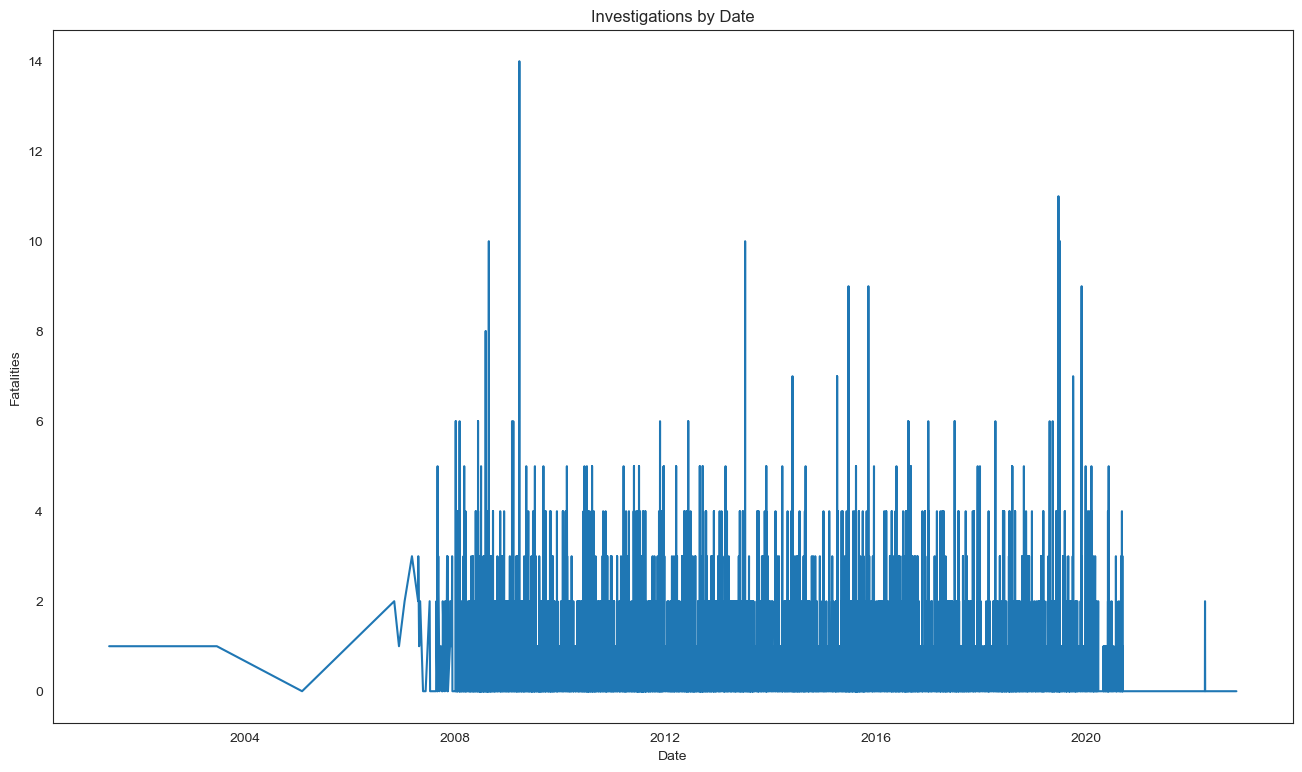

In [163]:
#Fatal Injuries by Year
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(df['Date'], df['Fatal_Injuries'])
ax.set_xlabel('Date')
ax.set_ylabel('Fatalities')
ax.set_title('Investigations by Date')

Text(0, 0.5, 'Number of Fatalities')

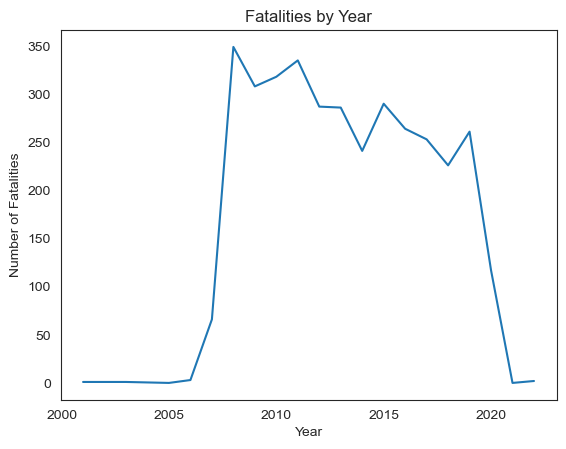

In [164]:
df_year=df.groupby(df['Date'].dt.year)['Fatal_Injuries'].sum()
df_year.head()

plt.plot(df_year)
plt.title('Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')

In [165]:
#Limited dataset to only be 2000 onward
df=df[(df['Date'].dt.year>=2000)]

### Final Cleaning to eliminate null values


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12917 entries, 50682 to 88767
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                12917 non-null  object        
 1   Type              12917 non-null  object        
 2   Accident_Number   12917 non-null  object        
 3   Date              12917 non-null  datetime64[ns]
 4   Country           12917 non-null  object        
 5   Injury_Severity   12917 non-null  object        
 6   Damage            12917 non-null  object        
 7   Category          12917 non-null  object        
 8   Make              12917 non-null  object        
 9   Model             12917 non-null  object        
 10  Amateur_Built     12917 non-null  object        
 11  Engines           12917 non-null  float64       
 12  Engine_Type       12917 non-null  object        
 13  Fatal_Injuries    12917 non-null  float64       
 14  Serious_Injuries  12917

In [167]:
#Percentage of null values in each column
print((df.isnull().sum()/df.shape[0]*100))

ID                  0.000000
Type                0.000000
Accident_Number     0.000000
Date                0.000000
Country             0.000000
Injury_Severity     0.000000
Damage              0.000000
Category            0.000000
Make                0.000000
Model               0.000000
Amateur_Built       0.000000
Engines             0.000000
Engine_Type         0.000000
Fatal_Injuries      0.000000
Serious_Injuries    0.000000
Minor_Injuries      0.000000
Uninjured           0.000000
Weather             0.000000
City                0.015483
State               0.000000
Model_Simplified    0.000000
Make_Model          0.000000
Total_Passengers    0.000000
dtype: float64


The fields that have null values are Injury Severity, Damage, Make, Engine_Type, Weather, and Report Status. All are under 13% so let's eliminate rows with null values.

In [168]:
##Drop Report Status
df=df.drop(['Report_Status'],axis=1)

KeyError: "['Report_Status'] not found in axis"

In [169]:
#Drop some rows with missing data
df.dropna(inplace=True)

In [170]:
#Confirming there is no missing data
df.isnull().sum()

ID                  0
Type                0
Accident_Number     0
Date                0
Country             0
Injury_Severity     0
Damage              0
Category            0
Make                0
Model               0
Amateur_Built       0
Engines             0
Engine_Type         0
Fatal_Injuries      0
Serious_Injuries    0
Minor_Injuries      0
Uninjured           0
Weather             0
City                0
State               0
Model_Simplified    0
Make_Model          0
Total_Passengers    0
dtype: int64

In [171]:
#Confirming how many rows we are left with
df.shape

(12915, 23)

We are left with 14,967 entries and 16 columns.

## Data Preparation Summary

Here is a recap of the steps we took for data preparation:

- Changed Event Date to datetime format.
- Checked for duplicates.
- Checked for null values and decided to drop columns that contained over 30% null values.
- Dropped columns that we did not need for this partifcular analysis.
- Split Injury Severity column to only contain the first word since the exact number is contained in the other columns.
- Renamed columns to simplify analyses.
- Replaced variations of value Unknown with a standardized version.
- Limited data set to just USA.
- Split location into city and state columns.
- Create simplified Model column containing zero to three digits or letters of Model to contain larger groups of Models and give us the ability to drill down if needed.
- Created column with total number of passengers.
- Limited data to Airplanes with fewer than 20 passengers
- Limited data to exclude amateur-built airplanes
- Limited data to exclude entries from after the year 2000.
- Dropped Report Status column
- Dropped rest of the null values.

In [172]:
df.to_csv('aviation.csv')

# Exploratory Data Analysis

import seaborn as sns

In [176]:
import seaborn as sns

## Exploring Engines

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12915 entries, 50682 to 88767
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                12915 non-null  object        
 1   Type              12915 non-null  object        
 2   Accident_Number   12915 non-null  object        
 3   Date              12915 non-null  datetime64[ns]
 4   Country           12915 non-null  object        
 5   Injury_Severity   12915 non-null  object        
 6   Damage            12915 non-null  object        
 7   Category          12915 non-null  object        
 8   Make              12915 non-null  object        
 9   Model             12915 non-null  object        
 10  Amateur_Built     12915 non-null  object        
 11  Engines           12915 non-null  float64       
 12  Engine_Type       12915 non-null  object        
 13  Fatal_Injuries    12915 non-null  float64       
 14  Serious_Injuries  12915

In [178]:
df.Engines.value_counts()

Engines
1.0    11514
2.0     1374
4.0       17
3.0        8
0.0        1
8.0        1
Name: count, dtype: int64

Text(0, 0.5, 'Number of Accidents')

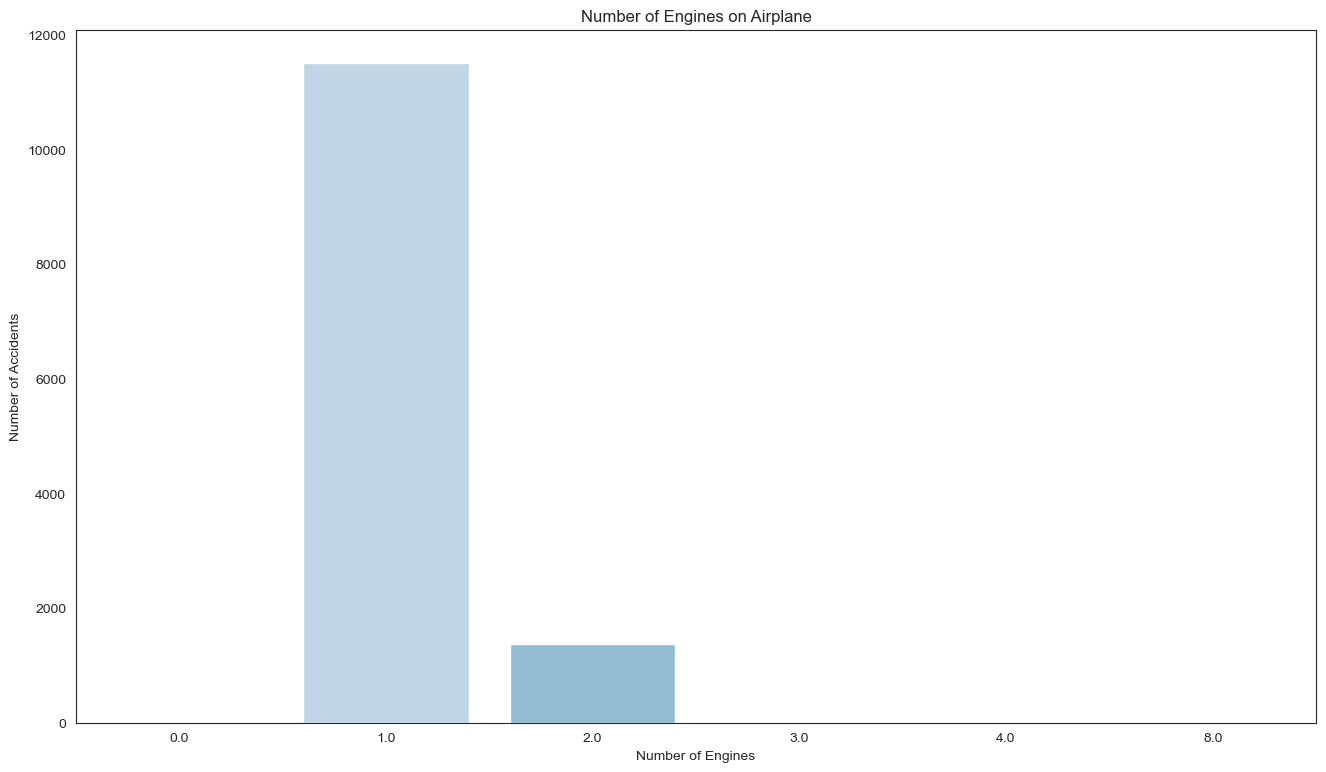

In [179]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
engines=sns.barplot(x=df['Engines'].value_counts().index, y=df['Engines'].value_counts().values,data=df, palette='Blues')
engines.set_title('Number of Engines on Airplane')
engines.set_xlabel('Number of Engines')
engines.set_ylabel('Number of Accidents')

It makes sense that the most aircraft involved in incidents in our dataset only had one engine. That means there is no other engine to rely on if one fails and there is less time for an emergency landing.

In [180]:
#Exploring Engine Types
df['Engine_Type'].value_counts()

Engine_Type
Reciprocating    11766
Turbo Prop         886
Turbo Fan          191
Turbo Jet           63
Turbo Shaft          5
Electric             4
Name: count, dtype: int64

Text(0, 0.5, 'Number of Accidents')

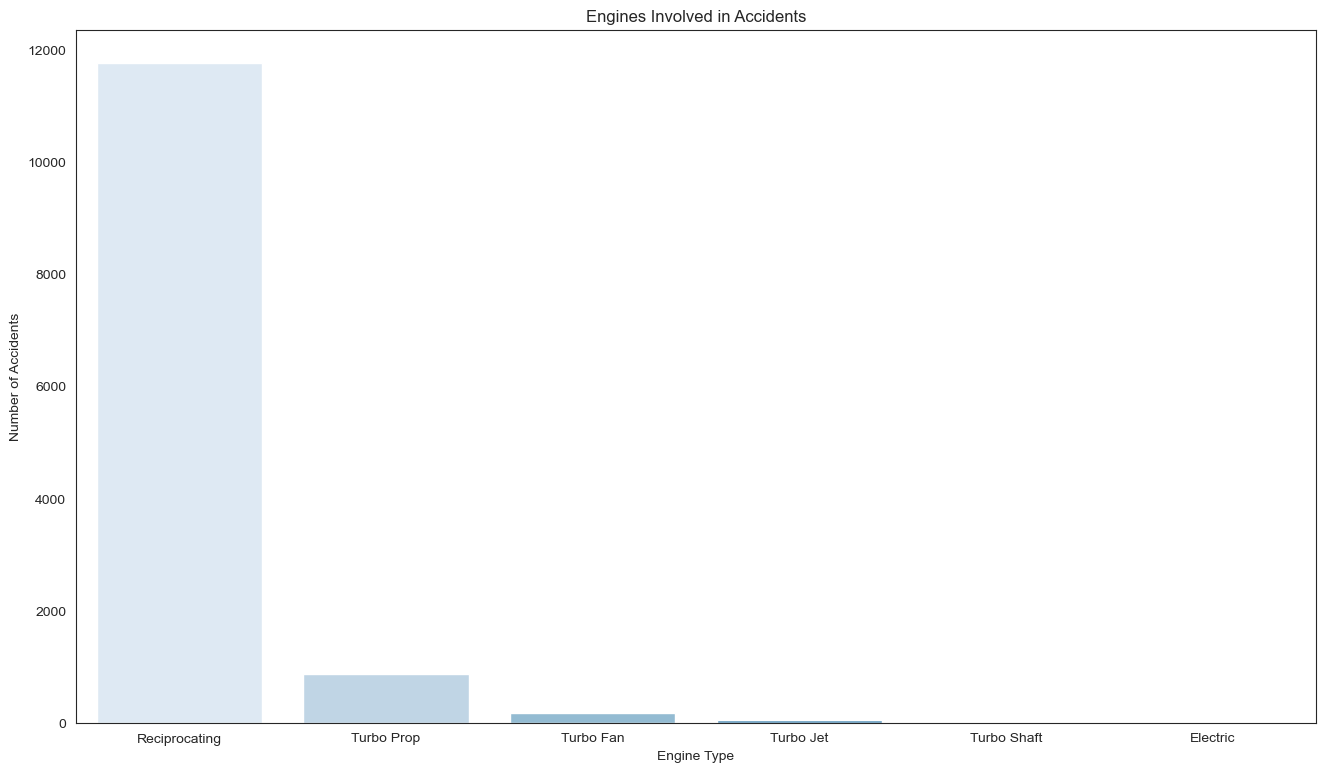

In [181]:
#Plotting Engine Types
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
engines=sns.barplot(x=df['Engine_Type'].value_counts().index, y=df['Engine_Type'].value_counts().values,data=df, palette='Blues')
engines.set_title('Engines Involved in Accidents')
engines.set_xlabel('Engine Type')
engines.set_ylabel('Number of Accidents')

Looks like Reciprocating Engines are involved in the most crashes. Let's filter aircraft with zero and one engine out of the dataset and see if this result changes.

In [182]:
df_subset=df[df['Engines']>=2]
df_subset.Engines.value_counts()

Engines
2.0    1374
4.0      17
3.0       8
8.0       1
Name: count, dtype: int64

Text(0, 0.5, 'Number of Accidents')

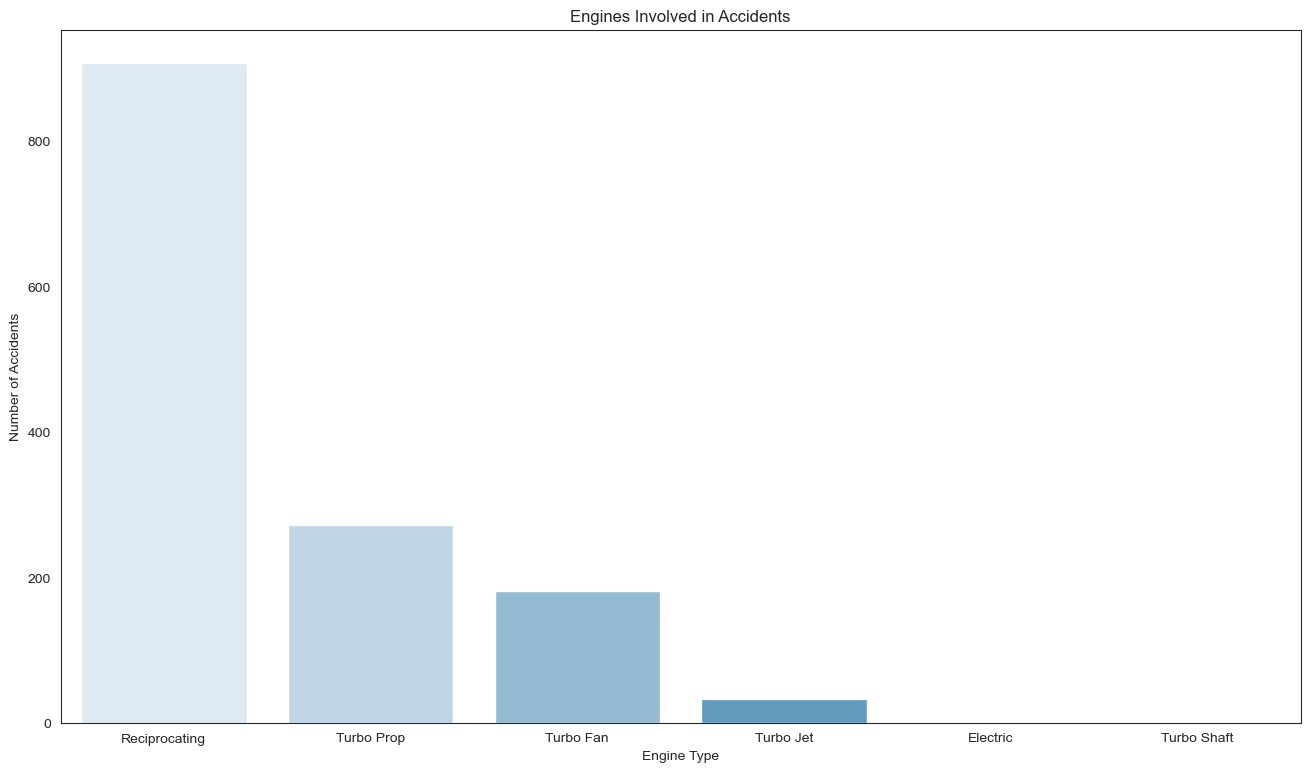

In [183]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
engines=sns.barplot(x=df_subset['Engine_Type'].value_counts().index, y=df_subset['Engine_Type'].value_counts().values,data=df_subset, palette='Blues')
engines.set_title('Engines Involved in Accidents')
engines.set_xlabel('Engine Type')
engines.set_ylabel('Number of Accidents')

Reciprocating still seems to be involved in the most crashes, but there is not as a drastic of a difference between Reciprocating and Turbo Fan now. Although it still seems that reciprocating engines are involved in the most accidents, so let's filter them out.

In [184]:
df_subset=df_subset[df_subset['Engine_Type']!='Reciprocating']
df_subset.Engine_Type.value_counts()

Engine_Type
Turbo Prop     273
Turbo Fan      182
Turbo Jet       34
Electric         2
Turbo Shaft      1
Name: count, dtype: int64

In [185]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 58138 to 88158
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                492 non-null    object        
 1   Type              492 non-null    object        
 2   Accident_Number   492 non-null    object        
 3   Date              492 non-null    datetime64[ns]
 4   Country           492 non-null    object        
 5   Injury_Severity   492 non-null    object        
 6   Damage            492 non-null    object        
 7   Category          492 non-null    object        
 8   Make              492 non-null    object        
 9   Model             492 non-null    object        
 10  Amateur_Built     492 non-null    object        
 11  Engines           492 non-null    float64       
 12  Engine_Type       492 non-null    object        
 13  Fatal_Injuries    492 non-null    float64       
 14  Serious_Injuries  492 non

## Exploring Makes

Text(0, 0.5, 'Number of Accidents')

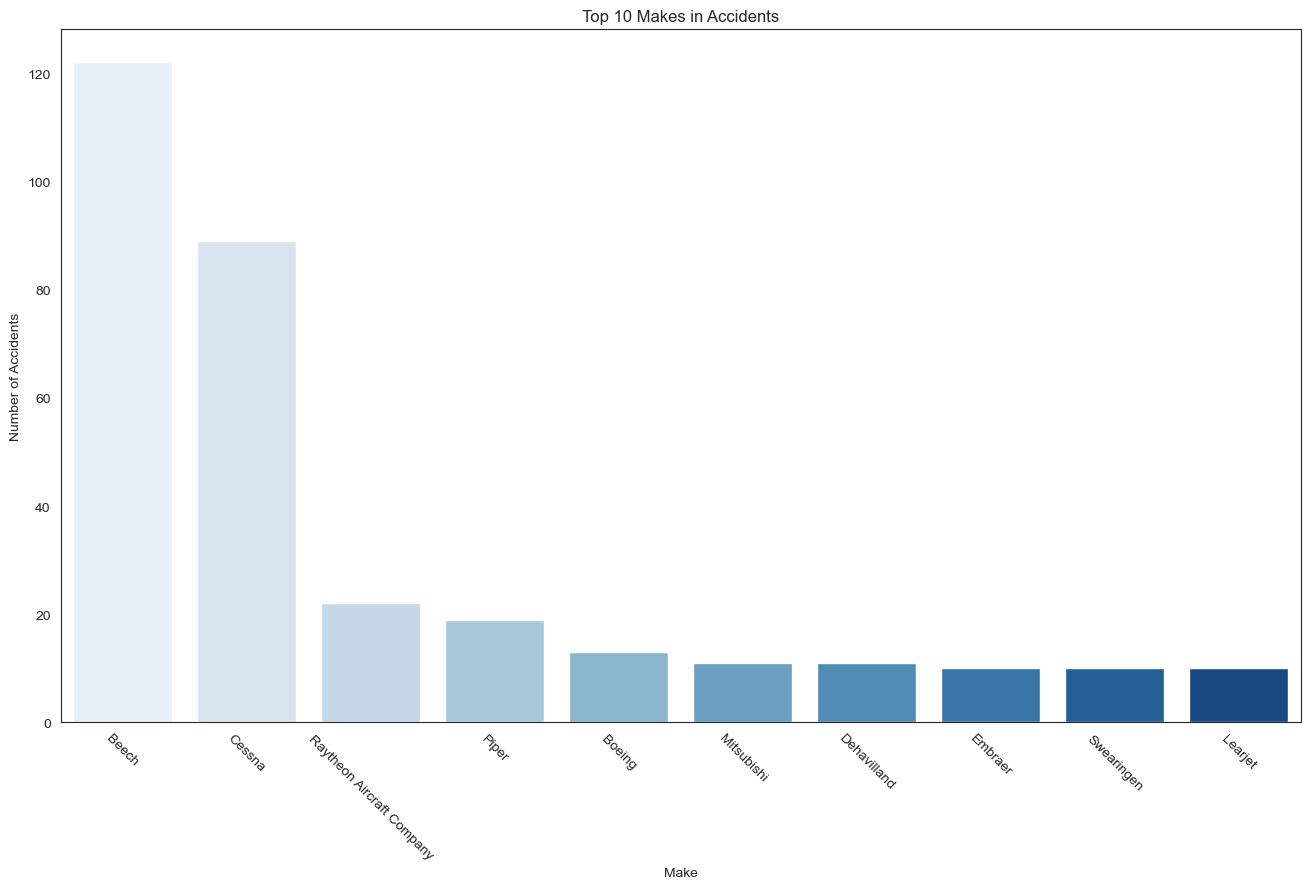

In [186]:
#Showing Top Makes Involved in Accidents
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
df_make=sns.barplot(data=df_subset, x=df_subset.Make.value_counts().index[:10], y=df_subset.Make.value_counts().values[:10], palette='Blues')
df_make.set_title('Top 10 Makes in Accidents')
df_make.set_xlabel('Make')
df_make.set_xticklabels(df_subset.Make.value_counts().index[:10], rotation=-45)
df_make.set_ylabel('Number of Accidents')

In [187]:
#Grouping Top 10 Makes by Fatal and Nonfatal
grouped_make=df_subset.groupby(['Make','Injury_Severity']).size().unstack().sort_values(by='Non-Fatal', ascending=False).head(10)
print(grouped_make)

Injury_Severity            Fatal  Non-Fatal
Make                                       
Beech                       24.0       98.0
Cessna                      21.0       68.0
Raytheon Aircraft Company    3.0       19.0
Boeing                       1.0       12.0
Swearingen                   NaN       10.0
Embraer                      1.0        9.0
Dehavilland                  3.0        8.0
Piaggio                      NaN        8.0
Piper                       11.0        8.0
Mitsubishi                   3.0        8.0


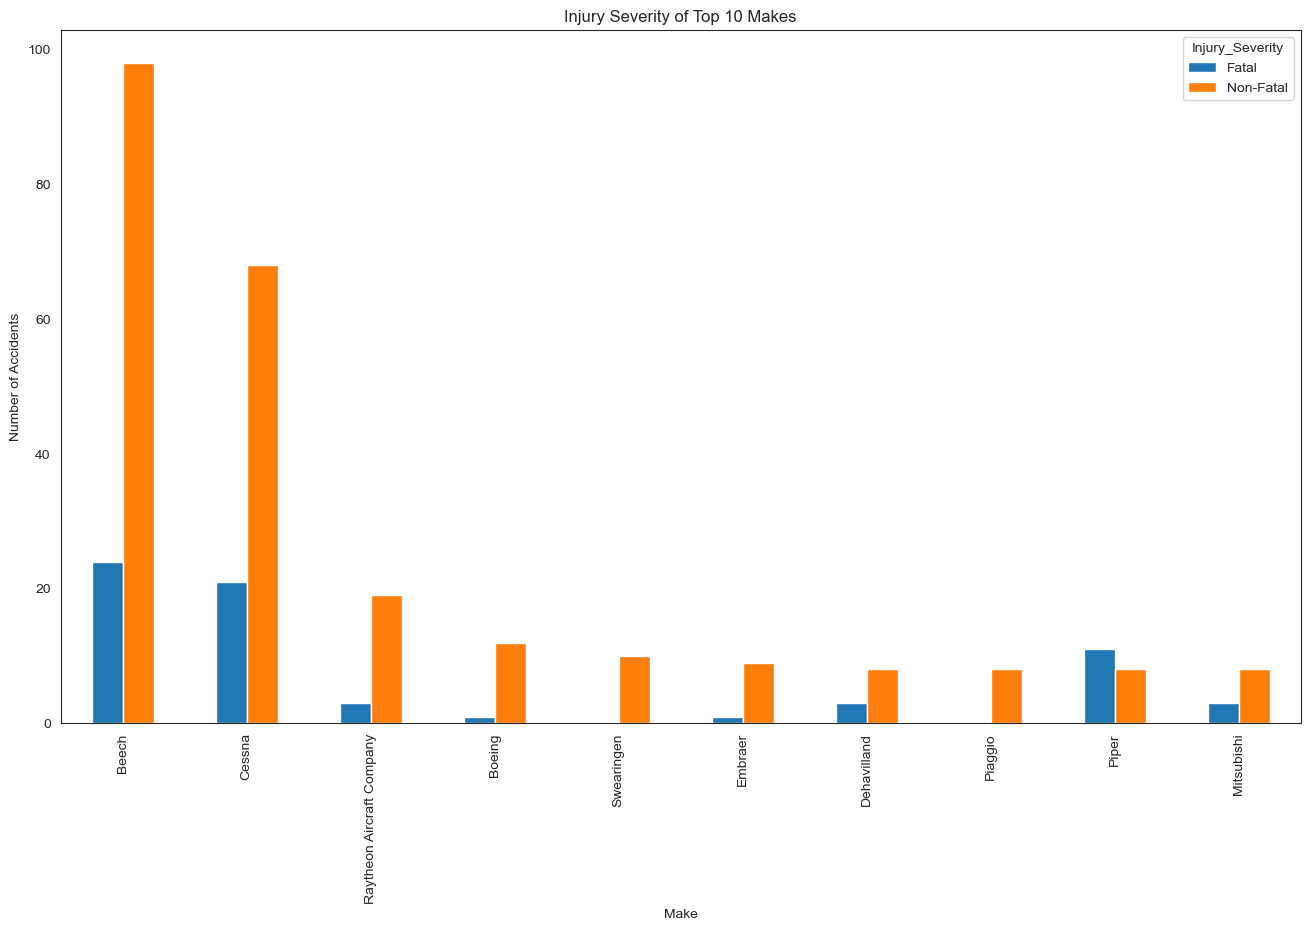

In [188]:
grouped_make.plot(kind='bar',stacked=False, figsize=(16,9))
plt.ylabel('Number of Accidents')
plt.title('Injury Severity of Top 10 Makes')
plt.show()

## Exploring Make and Model

In [189]:
df_subset.Make_Model.value_counts()

Make_Model
Beech-200                16
Cessna-550               15
Beech-C90                12
Cessna-525               10
Cessna-560                9
                         ..
Gulfstream-GVI            1
Beech-BE99                1
Beech-90B                 1
Bombardier-BD700 1A10     1
Bombardier-BD100 1A10     1
Name: count, Length: 254, dtype: int64

In [190]:
#Grouping Top 10 Models by Fatal and Nonfatal
grouped_makemodel=df_subset.groupby(['Make_Model','Injury_Severity']).size().unstack().sort_values(by='Non-Fatal', ascending=False).head(10)
print(grouped_makemodel)

Injury_Severity                 Fatal  Non-Fatal
Make_Model                                      
Cessna-550                        NaN       15.0
Beech-200                         4.0       12.0
Beech-C90                         2.0       10.0
Cessna-560XL                      NaN        9.0
Beech-B200                        NaN        7.0
Cessna-560                        2.0        7.0
Piaggio-P180                      NaN        5.0
Raytheon Aircraft Company-B200    NaN        5.0
Beech-1900C                       3.0        5.0
Raytheon Aircraft Company-400A    NaN        5.0


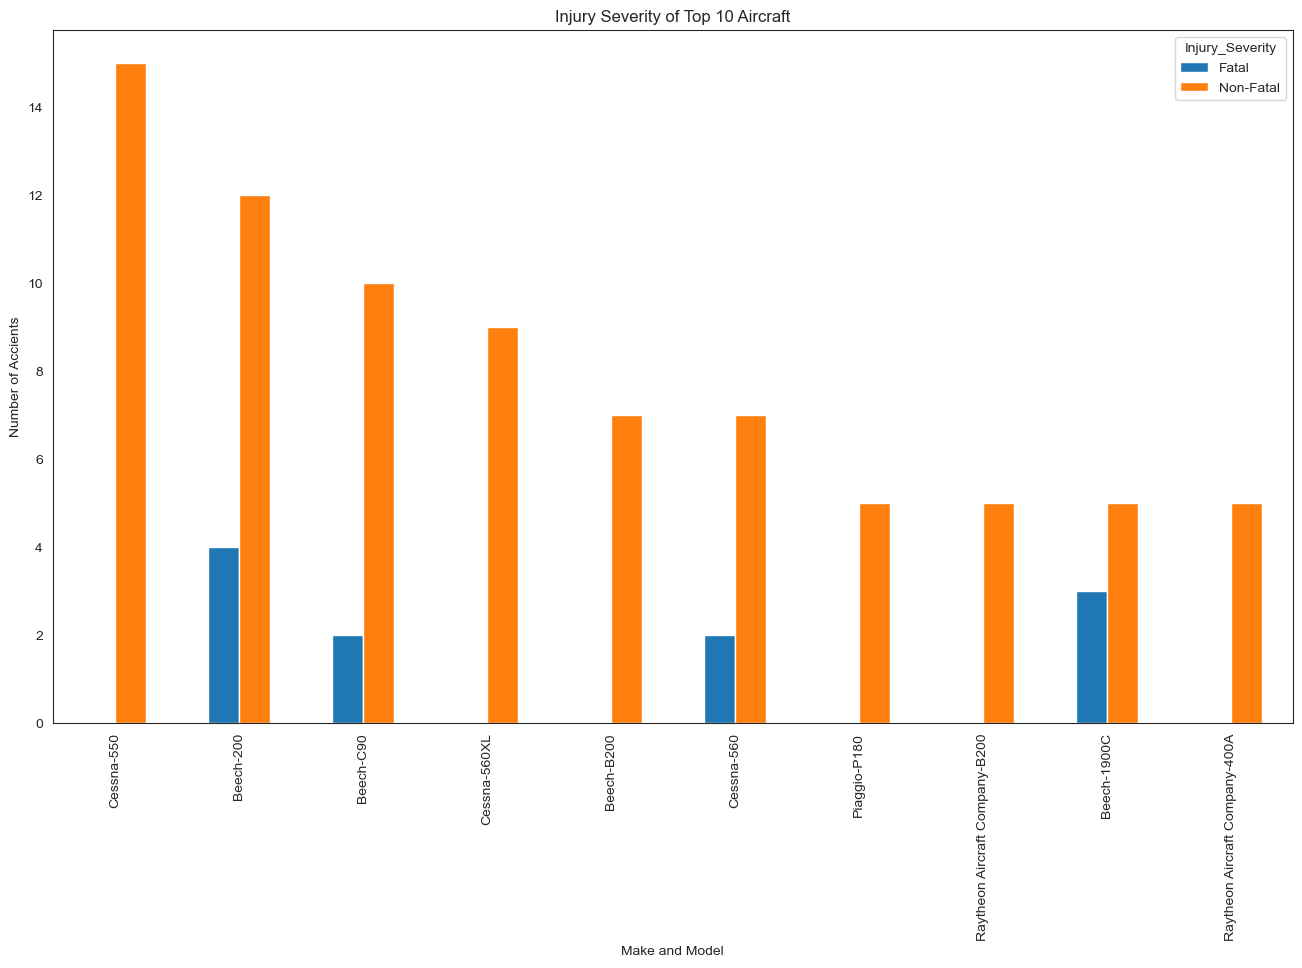

In [191]:
grouped_makemodel.plot(kind='bar',stacked=False, figsize=(16,9))
plt.xlabel('Make and Model')
plt.ylabel('Number of Accients')
plt.title('Injury Severity of Top 10 Aircraft')
plt.show()

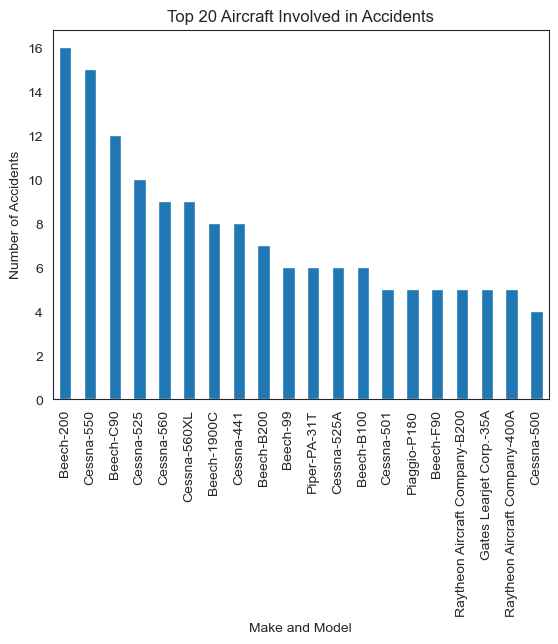

In [192]:
df_subset['Make_Model'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Make and Model')
plt.ylabel('Number of Accidents')
plt.title('Top 20 Aircraft Involved in Accidents')
plt.show()

In [193]:
df_subset['Make_Model'].value_counts().tail(50)

Make_Model
Morane-Saulnier-MS-760/B                   1
Fairchild-SW3                              1
Convair-CV-580                             1
Bombardier Inc-BD-100-1A10                 1
Mitsubishi-MU-2B-26A                       1
Beech-C90 - A                              1
Mitsubishi-MU-2B-25                        1
Learjet Inc-31A                            1
Embraer-EMB120                             1
Bombardier Learjet Corp.-35A               1
Rockwell International-690C                1
Short Bros. & Harland-SC7 SERIES 3         1
Short Bros-SHORTS SD3-60                   1
Beech-400A                                 1
Raytheon Aircraft Company-C90GT            1
British Aerospace-BAE JETSTREAM 3101       1
Rockwell International-690A                1
Learjet-36A                                1
Mcdonnell Douglas-MD-11F                   1
Beech-390                                  1
Hawker Beechcraft Corporation-390          1
Hawker Beechcraft-B200GT                   1

Beech and Cessna are involved in the most accidents.

## Exploring Locations

In [194]:
grouped_location=df_subset.groupby(['State','Injury_Severity']).size().unstack()
print(grouped_location)

Injury_Severity  Fatal  Non-Fatal
State                            
 AK                2.0       23.0
 AL                2.0        4.0
 AO                2.0        NaN
 AR                1.0        2.0
 AZ                3.0       11.0
 CA                4.0       36.0
 CO                2.0       20.0
 CT                1.0        2.0
 FL                6.0       30.0
 GA                9.0       11.0
 HI                2.0        2.0
 IA                1.0        6.0
 ID                NaN        5.0
 IL                3.0       13.0
 IN                3.0       10.0
 KS                1.0        1.0
 KY                NaN        3.0
 LA                3.0        1.0
 MA                2.0        3.0
 MD                1.0        3.0
 ME                1.0        1.0
 MI                2.0        8.0
 MN                1.0        8.0
 MO                1.0       11.0
 MS                1.0        3.0
 MT                3.0        4.0
 NC                2.0        8.0
 ND           

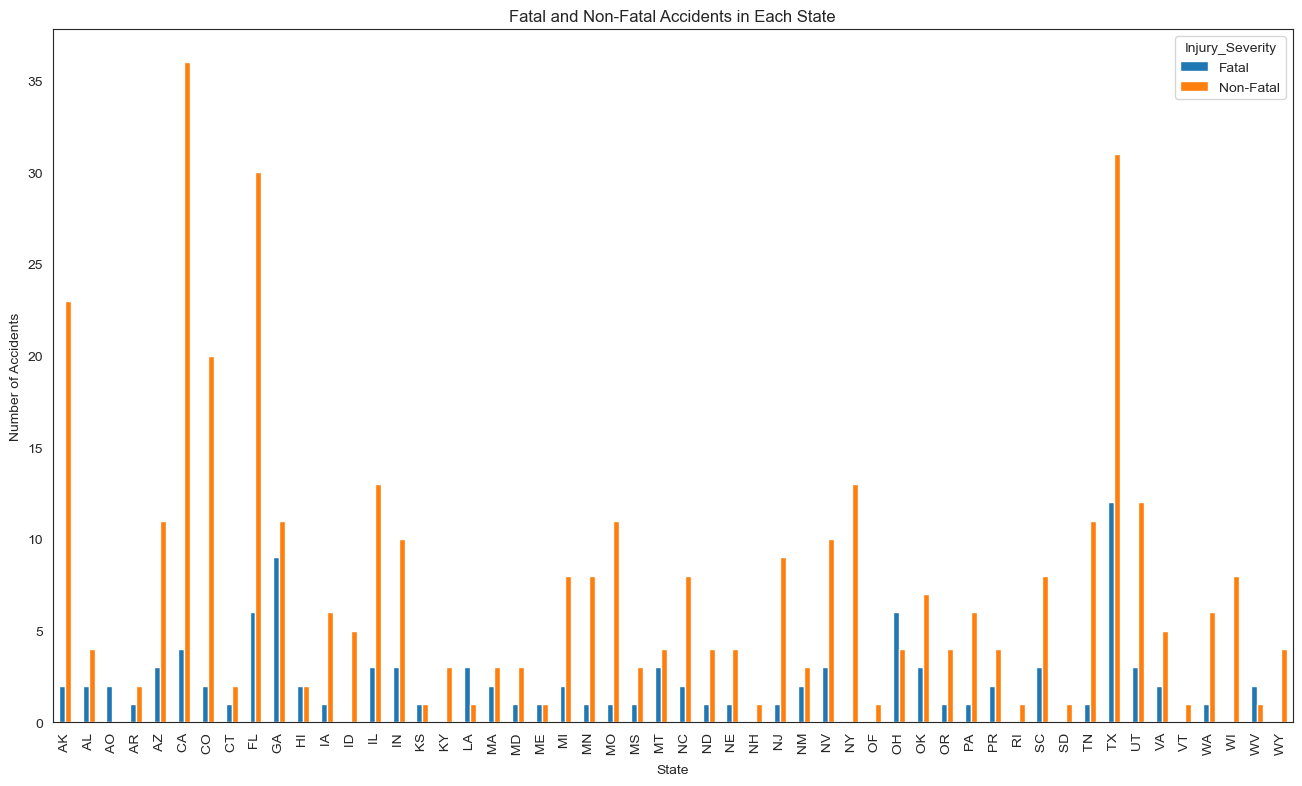

In [195]:
grouped_location.plot(kind='bar',stacked=False, figsize=(16,9))
plt.ylabel('Number of Accidents')
plt.title('Fatal and Non-Fatal Accidents in Each State')
plt.show()

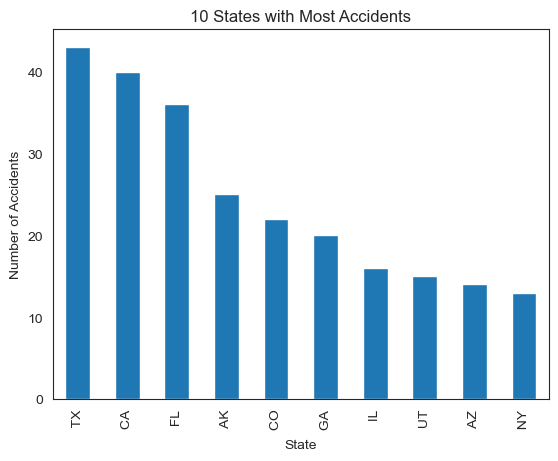

In [196]:
#Plotting 10 states with the most Accidents
df_subset.State.value_counts().head(10).plot(kind='bar')
plt.ylabel('Number of Accidents')
plt.title('10 States with Most Accidents')
plt.show()

Texas, California, and Florida seem to have the most accidents in them. I don't think this is a particulaly significant finding though as they are some of the most highly populated states in the USA so it is probably because the total number of flights is higher in those states to begin with.}

## Exploring Accidents by Month

In [197]:
df_subset['Month'] = pd.DatetimeIndex(df_subset['Date']).month

In [198]:
import calendar
df_subset['Month'] = df_subset['Month'].apply(lambda x: calendar.month_abbr[x])

In [199]:
df_subset['Month'].value_counts()

Month
Feb    58
Jun    50
Mar    46
May    45
Dec    45
Jan    41
Sep    38
Apr    36
Aug    35
Oct    34
Nov    32
Jul    32
Name: count, dtype: int64

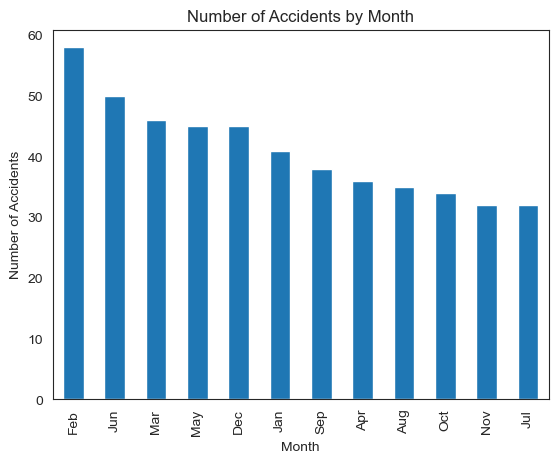

In [200]:
df_subset['Month'].value_counts().plot(kind='bar')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Month')
plt.show()

Although there the most accidents occurred in February, there doesn't seem to be a specific pattern or season that emerges as the most dangerous.

In [204]:
#Exporting filtered data set
df_subset.to_csv('aviation_subset.csv')

PermissionError: [Errno 13] Permission denied: 'aviation_subset.csv'

# Conclusions

## Limitations

The analysis above has the following limitations:
1. Limited to the United States.
2. Limited to accidents reported in the the Aviation Accident Database & Synopses.
3. This analysis excludes Amateur Built aircraft and incidents before the year 2000. Use the  Aviation Accident Database & Synopses dataset. The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

## Recommendations

### Engine
* It is not recommended to buy planes with less than two engines becuase it is smart to have a backup engine if one fails.
* Avoid reciprocating engines as they are associated with the most accidents.

### Make and Model
* Beech and Cessna are the makes of the airplanes with the most accidents. 
* Specifically, the Beech-200, Cessna-550, and Beech-C90 are the private aircrafts with the most accidents.



## Next Steps

1. The main source of data for this analysis was an accident database which is a specific set of information that is going to include “riskier” investments by the nature of the database. I recommend exploring other data points that will also inform this investment decision such as market share, reviews, awards, and data from outside the US.
2. To explore potential commercial aircraft investments, find a dataset that contains more information on commercial planes as this may yield more robust results in this category. Further research is required. 
